In [1]:
import acquire
import prepare
import explore
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pandas import DataFrame
from acquire import acquire_telco_data
from prepare import train_validate_test_split
from prepare import prep_telco_data

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

# Acquire

In [2]:
df = acquire_telco_data

In [3]:
df = acquire_telco_data(df)


In [4]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [5]:
df.shape

(7043, 21)

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [7]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [8]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

# Prepare

In [9]:
df = prep_telco_data(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             7043 non-null   object 
 1   senior_citizen                          7043 non-null   int64  
 2   tenure                                  7043 non-null   int64  
 3   monthly_charges                         7043 non-null   float64
 4   total_charges                           7032 non-null   float64
 5   internet_service_Fiber optic            7043 non-null   uint8  
 6   internet_service_No                     7043 non-null   uint8  
 7   gender_Male                             7043 non-null   uint8  
 8   payment_method_Credit card (automatic)  7043 non-null   uint8  
 9   payment_method_Electronic check         7043 non-null   uint8  
 10  payment_method_Mailed check             7043 non-null   uint

In [39]:
import pandas as pd

# load your data into a pandas DataFrame, let's call it df

# replace NaN values in the "total_charges" column with 2283.3004408418697
df['total_charges'].fillna(2283.3004408418697, inplace=True)

# print the updated DataFrame to verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             7043 non-null   object 
 1   senior_citizen                          7043 non-null   int64  
 2   tenure                                  7043 non-null   int64  
 3   monthly_charges                         7043 non-null   float64
 4   total_charges                           7043 non-null   float64
 5   internet_service_Fiber optic            7043 non-null   uint8  
 6   internet_service_No                     7043 non-null   uint8  
 7   gender_Male                             7043 non-null   uint8  
 8   payment_method_Credit card (automatic)  7043 non-null   uint8  
 9   payment_method_Electronic check         7043 non-null   uint8  
 10  payment_method_Mailed check             7043 non-null   uint

In [11]:
df.head()

customer_id  senior_citizen  tenure  monthly_charges  total_charges  \
0  7590-VHVEG               0       1            29.85          29.85   
1  5575-GNVDE               0      34            56.95        1889.50   
2  3668-QPYBK               0       2            53.85         108.15   
3  7795-CFOCW               0      45            42.30        1840.75   
4  9237-HQITU               0       2            70.70         151.65   

   internet_service_Fiber optic  internet_service_No  gender_Male  \
0                             0                    0            0   
1                             0                    0            1   
2                             0                    0            1   
3                             0                    0            1   
4                             1                    0            0   

   payment_method_Credit card (automatic)  payment_method_Electronic check  \
0                                       0                                1   
1                                       0                                0   
2                                       0                                0   
3                                       0                                0   
4                                       0                                1   

   ...  device_protection_No internet service  device_protection_Yes  \
0  ...                                      0                      0   
1  ...                                      0                      1   
2  ...                                      0                      0   
3  ...                                      0                      1   
4  ...                                      0                      0   

   Churn_Yes  tech_support_No internet service  tech_support_Yes  \
0          0                                 0                 0   
1          0                                 0                 0   
2          1                                 0                 0   
3          0                                 0                 1   
4          1                                 0                 0   

   streaming_movies_No internet service  streaming_movies_Yes  \
0                                     0                     0   
1                                     0                     0   
2                                     0                     0   
3                                     0                     0   
4                                     0                     0   

   streaming_tv_No internet service  streaming_tv_Yes  paperless_billing_Yes  
0                                 0                 0                      1  
1                                 0                 0                      0  
2                                 0                 0                      1  
3                                 0                 0                      0  
4                                 0                 0                      1  

[5 rows x 32 columns]

# Explore

In [12]:
train, validate, test = train_validate_test_split(df,
                                                  target = 'Churn_Yes',
                                                  seed=1349)

In [13]:
train.head()

customer_id  senior_citizen  tenure  monthly_charges  total_charges  \
6808  1116-DXXDF               0      39           100.45        3801.70   
421   5605-IYGFG               0       7            69.85         515.45   
22    1066-JKSGK               0       1            20.15          20.15   
3153  9099-FTUHS               0      23            54.40        1249.25   
4409  5227-JSCFE               1      71            46.35        3353.40   

      internet_service_Fiber optic  internet_service_No  gender_Male  \
6808                             1                    0            1   
421                              1                    0            0   
22                               0                    1            1   
3153                             0                    0            0   
4409                             0                    0            1   

      payment_method_Credit card (automatic)  payment_method_Electronic check  \
6808                                       0                                1   
421                                        0                                0   
22                                         0                                0   
3153                                       0                                1   
4409                                       1                                0   

      ...  device_protection_No internet service  device_protection_Yes  \
6808  ...                                      0                      1   
421   ...                                      0                      0   
22    ...                                      1                      0   
3153  ...                                      0                      0   
4409  ...                                      0                      1   

      Churn_Yes  tech_support_No internet service  tech_support_Yes  \
6808          0                                 0                 0   
421           0                                 0                 0   
22            1                                 1                 0   
3153          0                                 0                 0   
4409          0                                 0                 1   

      streaming_movies_No internet service  streaming_movies_Yes  \
6808                                     0                     1   
421                                      0                     0   
22                                       1                     0   
3153                                     0                     0   
4409                                     0                     0   

      streaming_tv_No internet service  streaming_tv_Yes  \
6808                                 0                 1   
421                                  0                 0   
22                                   1                 0   
3153                                 0                 0   
4409                                 0                 0   

      paperless_billing_Yes  
6808                      1  
421                       1  
22                        0  
3153                      0  
4409                      0  

[5 rows x 32 columns]

In [14]:
X_train = train.drop(columns=['Churn_Yes'])
y_train = train.Churn_Yes

X_validate = validate.drop(columns=['Churn_Yes'])
y_validate = validate.Churn_Yes

X_test = test.drop(columns=['Churn_Yes'])
y_test = test.Churn_Yes

In [15]:
df.Churn_Yes.value_counts() # (We will use 'No')

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [16]:
baseline_accuracy = (train.Churn_Yes== 0).mean()
round(baseline_accuracy, 3)

0.735

# Value Count

In [17]:
cat_vars = ['Churn_Yes','senior_citizen','partner_Yes','dependents_Yes','phone_service_Yes',
            'multiple_lines_Yes','online_security_Yes',
            'streaming_tv_Yes','streaming_movies_Yes',
            'paperless_billing_Yes','online_backup_Yes','device_protection_Yes',
            'tech_support_Yes','internet_service_Fiber optic',
            'internet_service_No','gender_Male','payment_method_Credit card (automatic)',
            'payment_method_Electronic check','payment_method_Mailed check','contract_One year',
            'contract_Two year']

quant_vars = ['monthly_charges','total_charges','tenure']

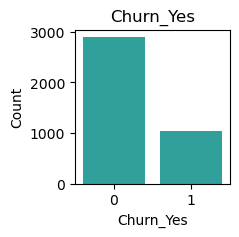

   Churn_Yes  Count  Percent
0          0   2897    73.47
1          1   1046    26.53
_________________________________________________________________


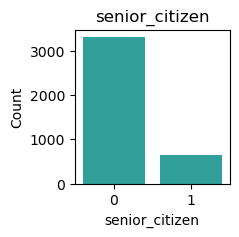

   senior_citizen  Count  Percent
0               0   3307    83.87
1               1    636    16.13
_________________________________________________________________


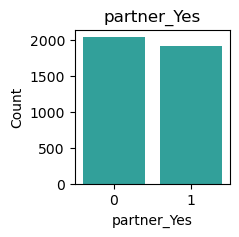

   partner_Yes  Count  Percent
0            0   2035    51.61
1            1   1908    48.39
_________________________________________________________________


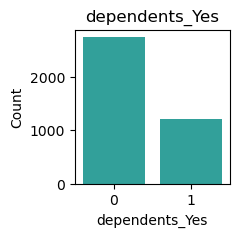

   dependents_Yes  Count  Percent
0               0   2742    69.54
1               1   1201    30.46
_________________________________________________________________


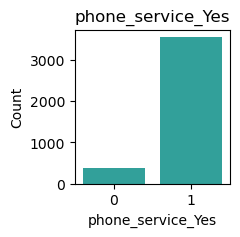

   phone_service_Yes  Count  Percent
1                  1   3561    90.31
0                  0    382     9.69
_________________________________________________________________


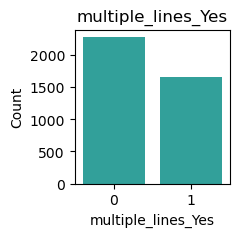

   multiple_lines_Yes  Count  Percent
0                   0   2283     57.9
1                   1   1660     42.1
_________________________________________________________________


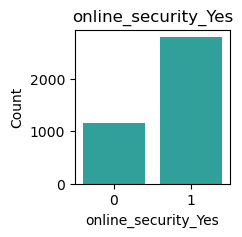

   online_security_Yes  Count  Percent
0                    1   2795    70.89
1                    0   1148    29.11
_________________________________________________________________


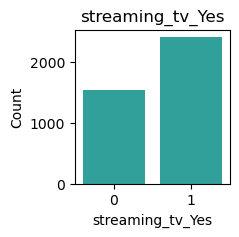

   streaming_tv_Yes  Count  Percent
0                 1   2403    60.94
1                 0   1540    39.06
_________________________________________________________________


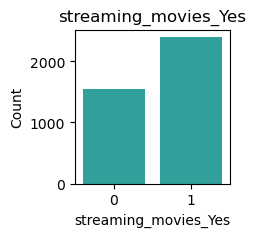

   streaming_movies_Yes  Count  Percent
0                     1   2401    60.89
1                     0   1542    39.11
_________________________________________________________________


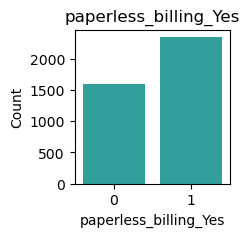

   paperless_billing_Yes  Count  Percent
1                      1   2349    59.57
0                      0   1594    40.43
_________________________________________________________________


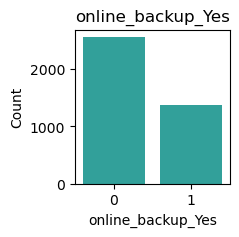

   online_backup_Yes  Count  Percent
0                  0   2563     65.0
1                  1   1380     35.0
_________________________________________________________________


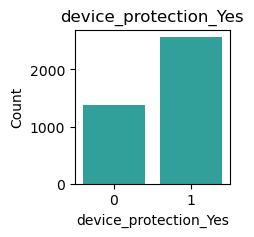

   device_protection_Yes  Count  Percent
0                      1   2570    65.18
1                      0   1373    34.82
_________________________________________________________________


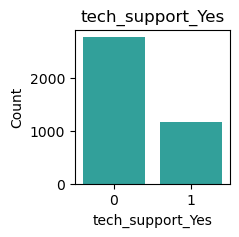

   tech_support_Yes  Count  Percent
0                 0   2772     70.3
1                 1   1171     29.7
_________________________________________________________________


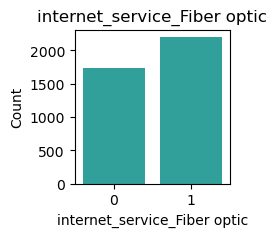

   internet_service_Fiber optic  Count  Percent
0                             1   2201    55.82
1                             0   1742    44.18
_________________________________________________________________


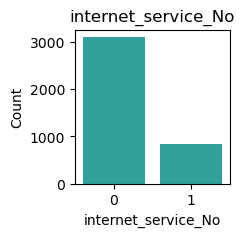

   internet_service_No  Count  Percent
0                    0   3100    78.62
1                    1    843    21.38
_________________________________________________________________


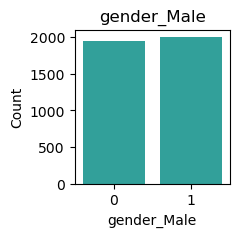

   gender_Male  Count  Percent
1            1   2001    50.75
0            0   1942    49.25
_________________________________________________________________


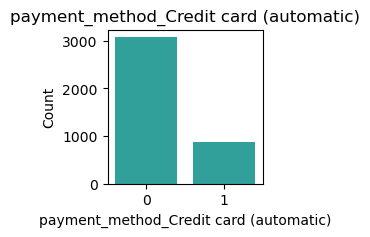

   payment_method_Credit card (automatic)  Count  Percent
0                                       0   3077    78.04
1                                       1    866    21.96
_________________________________________________________________


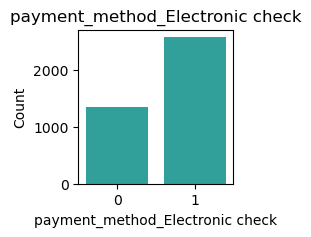

   payment_method_Electronic check  Count  Percent
0                                1   2585    65.56
1                                0   1358    34.44
_________________________________________________________________


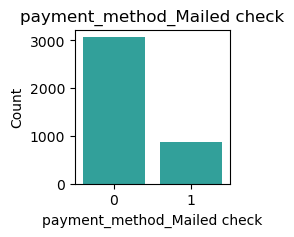

   payment_method_Mailed check  Count  Percent
0                            0   3070    77.86
1                            1    873    22.14
_________________________________________________________________


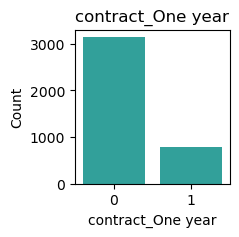

   contract_One year  Count  Percent
0                  0   3146    79.79
1                  1    797    20.21
_________________________________________________________________


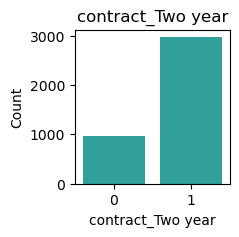

   contract_Two year  Count  Percent
0                  1   2971    75.35
1                  0    972    24.65
_________________________________________________________________


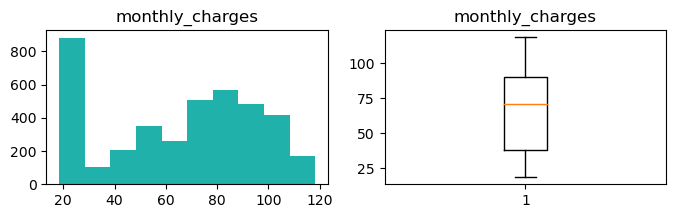

count    3943.000000
mean       65.081714
std        29.930765
min        18.400000
25%        38.100000
50%        70.700000
75%        89.775000
max       118.350000
Name: monthly_charges, dtype: float64


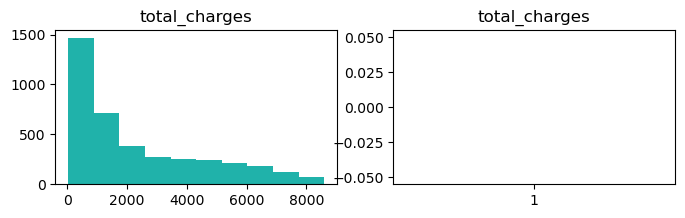

count    3938.000000
mean     2296.088992
std      2251.397217
min        18.800000
25%       434.275000
50%      1419.400000
75%      3774.762500
max      8594.400000
Name: total_charges, dtype: float64


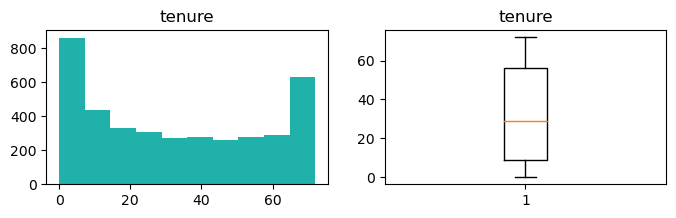

count    3943.000000
mean       32.739792
std        24.530523
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


In [18]:
explore.explore_univariate(train, cat_vars, quant_vars)


# Bivariate Stats (use target var. Chruned)

In [19]:
print(cat_vars)
print('---------')
print(quant_vars)

['Churn_Yes', 'senior_citizen', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes', 'multiple_lines_Yes', 'online_security_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes', 'paperless_billing_Yes', 'online_backup_Yes', 'device_protection_Yes', 'tech_support_Yes', 'internet_service_Fiber optic', 'internet_service_No', 'gender_Male', 'payment_method_Credit card (automatic)', 'payment_method_Electronic check', 'payment_method_Mailed check', 'contract_One year', 'contract_Two year']
---------
['monthly_charges', 'total_charges', 'tenure']


In [20]:
cat_vars = cat_vars[1:]


senior_citizen 
_____________________

        chi2       p-value  degrees of freedom
0  93.856079  3.393207e-22                   1

observed:
 Churn_Yes          0     1   All
senior_citizen                  
0               2529   778  3307
1                368   268   636
All             2897  1046  3943

expected:
              0           1
0  2429.718235  877.281765
1   467.281765  168.718235


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


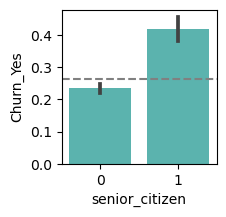


_____________________

partner_Yes 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


        chi2       p-value  degrees of freedom
0  88.942119  4.065350e-21                   1

observed:
 Churn_Yes       0     1   All
partner_Yes                  
0            1364   671  2035
1            1533   375  1908
All          2897  1046  3943

expected:
              0           1
0  1495.154705  539.845295
1  1401.845295  506.154705


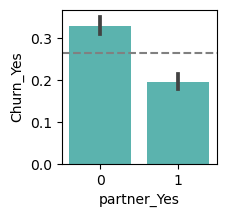


_____________________

dependents_Yes 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2       p-value  degrees of freedom
0  127.563708  1.398393e-29                   1

observed:
 Churn_Yes          0     1   All
dependents_Yes                  
0               1870   872  2742
1               1027   174  1201
All             2897  1046  3943

expected:
              0           1
0  2014.601572  727.398428
1   882.398428  318.601572


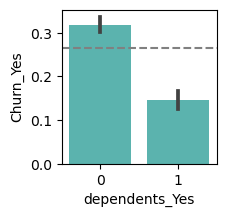


_____________________

phone_service_Yes 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


       chi2   p-value  degrees of freedom
0  0.695189  0.404405                   1

observed:
 Churn_Yes             0     1   All
phone_service_Yes                  
0                   288    94   382
1                  2609   952  3561
All                2897  1046  3943

expected:
              0           1
0   280.662947  101.337053
1  2616.337053  944.662947


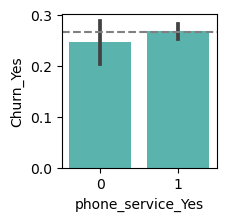


_____________________

multiple_lines_Yes 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


        chi2   p-value  degrees of freedom
0  10.874495  0.000975                   1

observed:
 Churn_Yes              0     1   All
multiple_lines_Yes                  
0                   1723   560  2283
1                   1174   486  1660
All                 2897  1046  3943

expected:
              0           1
0  1677.365204  605.634796
1  1219.634796  440.365204


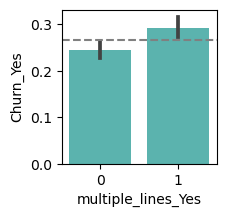


_____________________

online_security_Yes 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


        chi2       p-value  degrees of freedom
0  114.97737  7.960069e-27                   1

observed:
 Churn_Yes               0     1   All
online_security_Yes                  
0                    1918   877  2795
1                     979   169  1148
All                  2897  1046  3943

expected:
             0          1
0  2053.54172  741.45828
1   843.45828  304.54172


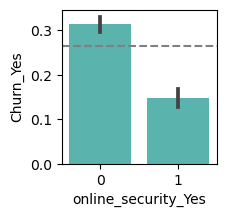


_____________________

streaming_tv_Yes 
_____________________

        chi2   p-value  degrees of freedom
0  17.124261  0.000035                   1

observed:
 Churn_Yes            0     1   All
streaming_tv_Yes                  
0                 1822   581  2403
1                 1075   465  1540
All               2897  1046  3943

expected:
              0           1
0  1765.531575  637.468425
1  1131.468425  408.531575


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


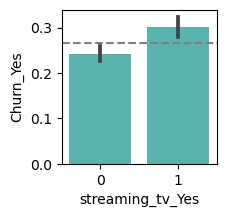


_____________________

streaming_movies_Yes 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


        chi2       p-value  degrees of freedom
0  30.276902  3.745600e-08                   1

observed:
 Churn_Yes                0     1   All
streaming_movies_Yes                  
0                     1839   562  2401
1                     1058   484  1542
All                   2897  1046  3943

expected:
              0           1
0  1764.062135  636.937865
1  1132.937865  409.062135


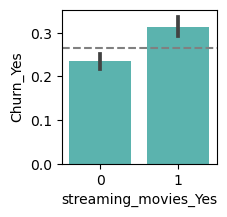


_____________________

paperless_billing_Yes 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2       p-value  degrees of freedom
0  160.503756  8.781826e-37                   1

observed:
 Churn_Yes                 0     1   All
paperless_billing_Yes                  
0                      1344   250  1594
1                      1553   796  2349
All                    2897  1046  3943

expected:
              0           1
0  1171.143292  422.856708
1  1725.856708  623.143292


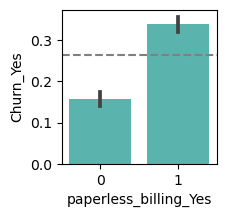


_____________________

online_backup_Yes 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


        chi2       p-value  degrees of freedom
0  28.498281  9.378173e-08                   1

observed:
 Churn_Yes             0     1   All
online_backup_Yes                  
0                  1812   751  2563
1                  1085   295  1380
All                2897  1046  3943

expected:
              0           1
0  1883.086736  679.913264
1  1013.913264  366.086736


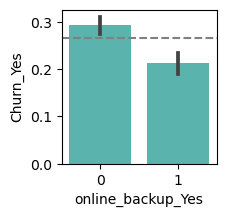


_____________________

device_protection_Yes 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


        chi2   p-value  degrees of freedom
0  21.144617  0.000004                   1

observed:
 Churn_Yes                 0     1   All
device_protection_Yes                  
0                      1827   743  2570
1                      1070   303  1373
All                    2897  1046  3943

expected:
              0           1
0  1888.229774  681.770226
1  1008.770226  364.229774


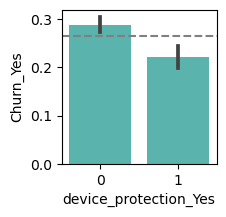


_____________________

tech_support_Yes 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2       p-value  degrees of freedom
0  103.942434  2.082805e-24                   1

observed:
 Churn_Yes            0     1   All
tech_support_Yes                  
0                 1907   865  2772
1                  990   181  1171
All               2897  1046  3943

expected:
              0           1
0  2036.643165  735.356835
1   860.356835  310.643165


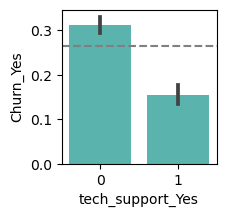


_____________________

internet_service_Fiber optic 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2       p-value  degrees of freedom
0  400.131256  5.156582e-89                   1

observed:
 Churn_Yes                        0     1   All
internet_service_Fiber optic                  
0                             1893   308  2201
1                             1004   738  1742
All                           2897  1046  3943

expected:
              0           1
0  1617.118184  583.881816
1  1279.881816  462.118184


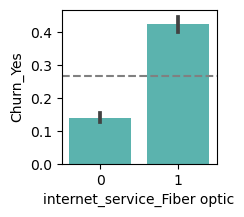


_____________________

internet_service_No 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2       p-value  degrees of freedom
0  196.029669  1.535641e-44                   1

observed:
 Churn_Yes               0     1   All
internet_service_No                  
0                    2118   982  3100
1                     779    64   843
All                  2897  1046  3943

expected:
              0           1
0  2277.631245  822.368755
1   619.368755  223.631245


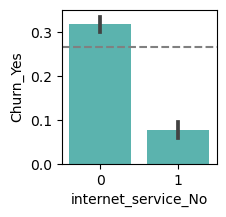


_____________________

gender_Male 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


      chi2   p-value  degrees of freedom
0  0.00915  0.923793                   1

observed:
 Churn_Yes       0     1   All
gender_Male                  
0            1425   517  1942
1            1472   529  2001
All          2897  1046  3943

expected:
              0           1
0  1426.825767  515.174233
1  1470.174233  530.825767


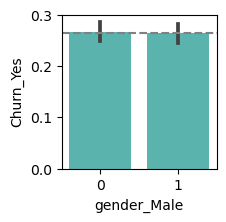


_____________________

payment_method_Credit card (automatic) 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


        chi2       p-value  degrees of freedom
0  68.853635  1.060489e-16                   1

observed:
 Churn_Yes                                  0     1   All
payment_method_Credit card (automatic)                  
0                                       2165   912  3077
1                                        732   134   866
All                                     2897  1046  3943

expected:
              0           1
0  2260.732691  816.267309
1   636.267309  229.732691


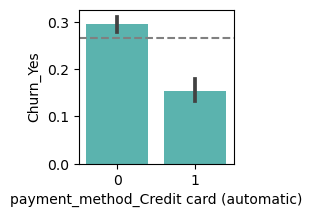


_____________________

payment_method_Electronic check 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2       p-value  degrees of freedom
0  318.931189  2.475784e-71                   1

observed:
 Churn_Yes                           0     1   All
payment_method_Electronic check                  
0                                2135   450  2585
1                                 762   596  1358
All                              2897  1046  3943

expected:
              0           1
0  1899.250571  685.749429
1   997.749429  360.250571


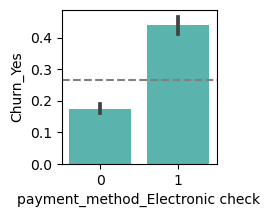


_____________________

payment_method_Mailed check 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


       chi2       p-value  degrees of freedom
0  28.16974  1.111284e-07                   1

observed:
 Churn_Yes                       0     1   All
payment_method_Mailed check                  
0                            2194   876  3070
1                             703   170   873
All                          2897  1046  3943

expected:
              0           1
0  2255.589653  814.410347
1   641.410347  231.589653


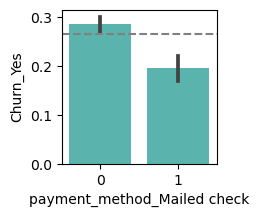


_____________________

contract_One year 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2       p-value  degrees of freedom
0  119.947868  6.494519e-28                   1

observed:
 Churn_Yes             0     1   All
contract_One year                  
0                  2189   957  3146
1                   708    89   797
All                2897  1046  3943

expected:
              0           1
0  2311.428354  834.571646
1   585.571646  211.428354


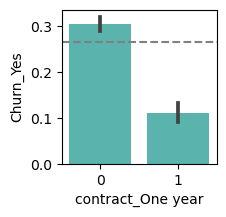


_____________________

contract_Two year 
_____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


         chi2       p-value  degrees of freedom
0  365.293869  1.980990e-81                   1

observed:
 Churn_Yes             0     1   All
contract_Two year                  
0                  1954  1017  2971
1                   943    29   972
All                2897  1046  3943

expected:
              0           1
0  2182.852397  788.147603
1   714.147603  257.852397


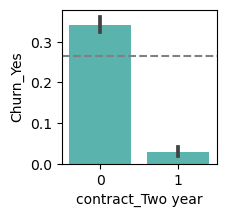


_____________________

monthly_charges 
____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 77.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 54.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


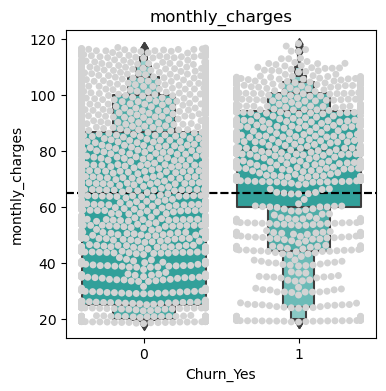

            count       mean        std    min    25%    50%    75%     max
Churn_Yes                                                                  
0          2897.0  61.438333  30.865737  18.40  25.15  65.15  86.85  116.95
1          1046.0  75.172419  24.504287  18.95  59.90  80.25  94.40  118.35 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1132494.0, pvalue=7.81820255578214e-34)

____________________

total_charges 
____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 74.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


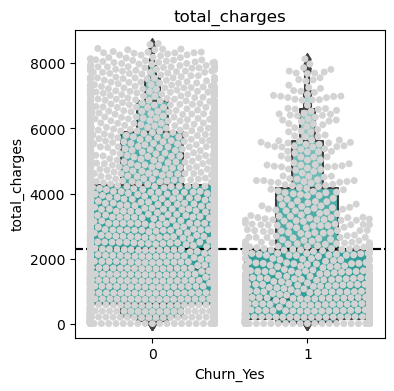

            count         mean          std   min      25%       50%  \
Churn_Yes                                                              
0          2892.0  2558.071127  2306.560402  18.8  619.825  1689.175   
1          1046.0  1571.755975  1913.883152  19.1  152.600   777.700   

                 75%     max  
Churn_Yes                     
0          4264.4375  8594.4  
1          2284.8500  8127.6   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=nan, pvalue=nan)

____________________

tenure 
____________________



/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 78.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


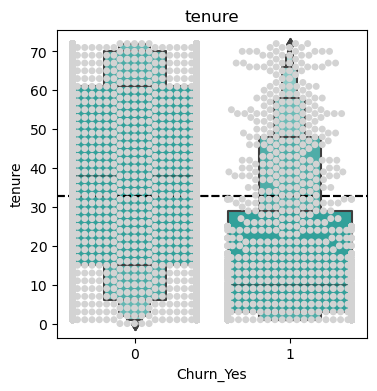

            count       mean        std  min   25%   50%   75%   max
Churn_Yes                                                           
0          2897.0  37.930963  24.036648  0.0  15.0  38.0  61.0  72.0
1          1046.0  18.362333  19.676855  1.0   3.0  10.0  29.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2238307.5, pvalue=2.594324121521284e-116)

____________________



In [21]:
explore.explore_bivariate(train, 'Churn_Yes', cat_vars, quant_vars)

In [22]:
# Take-aways
# 1742 indivudals who have Fiber Optic as their 
# internet service are churining

# Multivariate Stats & Analysis

In [23]:
cat_vars = ['internet_service_Fiber optic','senior_citizen','tech_support_Yes']

quant_vars = ['monthly_charges']

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 74.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 76.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 74.7% of the points

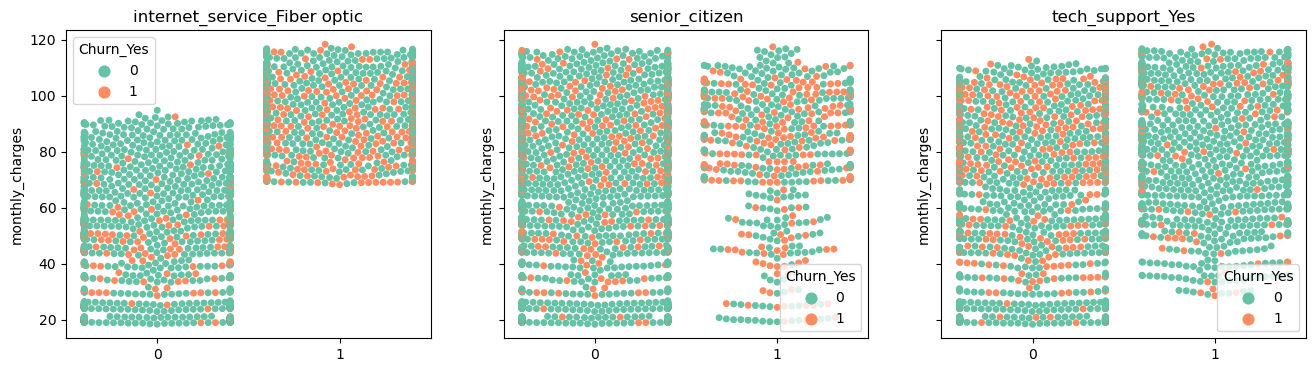

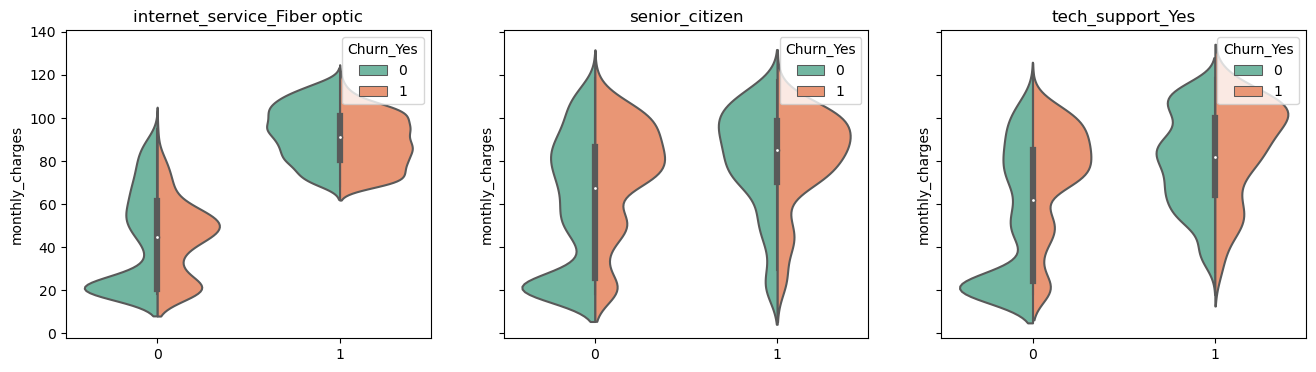

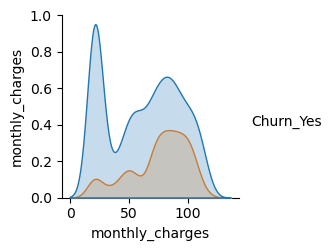

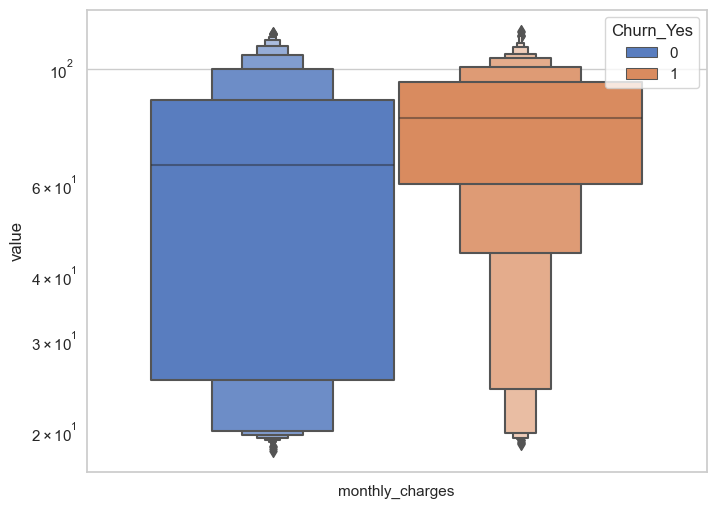

In [24]:
target = 'Churn_Yes'

explore.explore_multivariate(train, target, cat_vars, quant_vars)


In [25]:
at_vars = ['partner_Yes','dependents_Yes','phone_service_Yes',
            'multiple_lines_Yes','online_security_Yes']

quant_vars = ['monthly_charges']

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 74.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 76.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 74.7% of the points

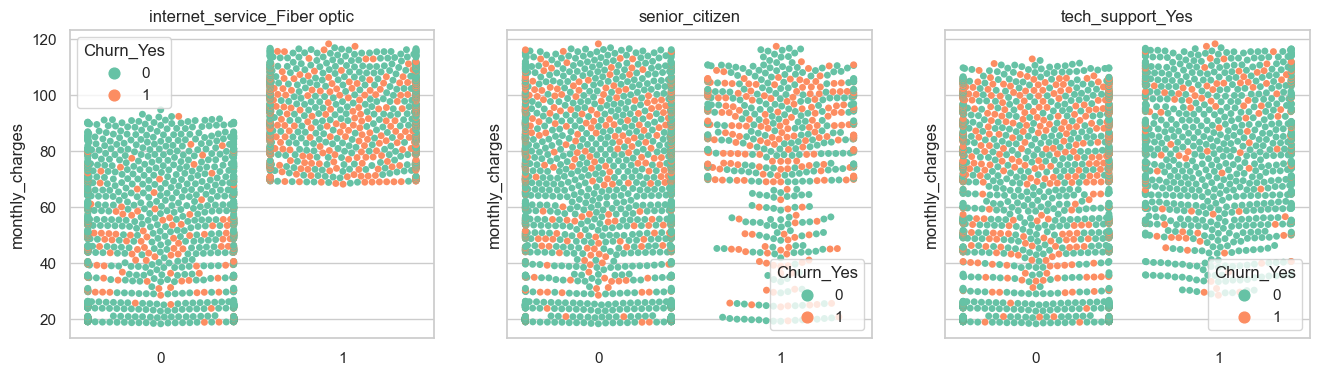

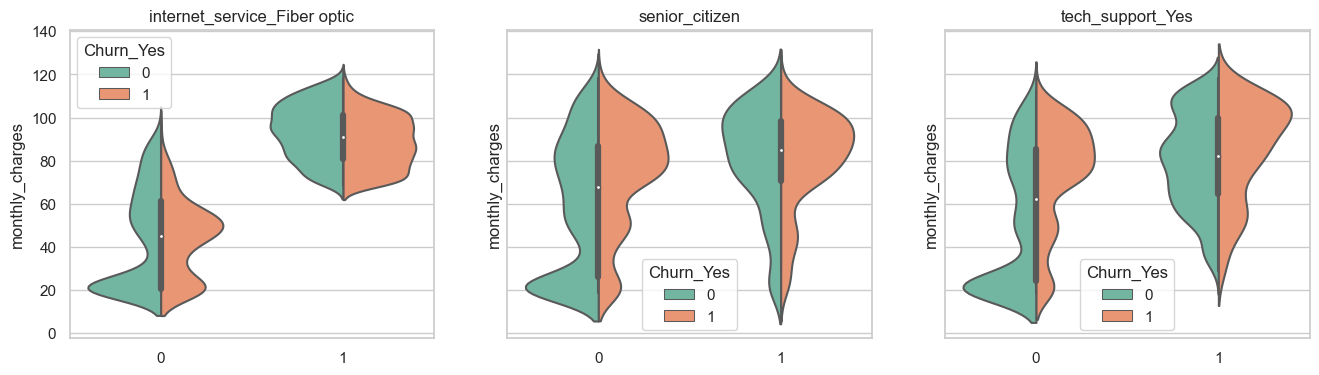

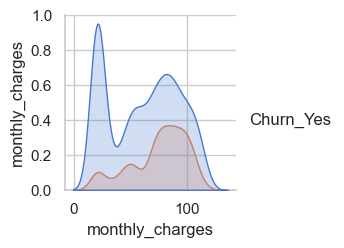

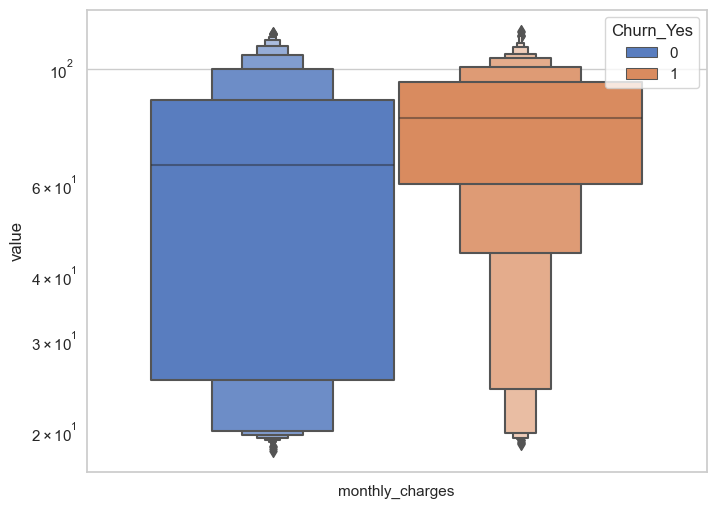

In [26]:
target = 'Churn_Yes'

explore.explore_multivariate(train, target, cat_vars, quant_vars)

In [27]:
cat_vars = ['streaming_tv_Yes','streaming_movies_Yes','device_protection_Yes','gender_Male',
            'payment_method_Electronic check','payment_method_Mailed check']
quant_vars = ['monthly_charges', 'tenure']

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 79.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 86.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 86.3% of the points

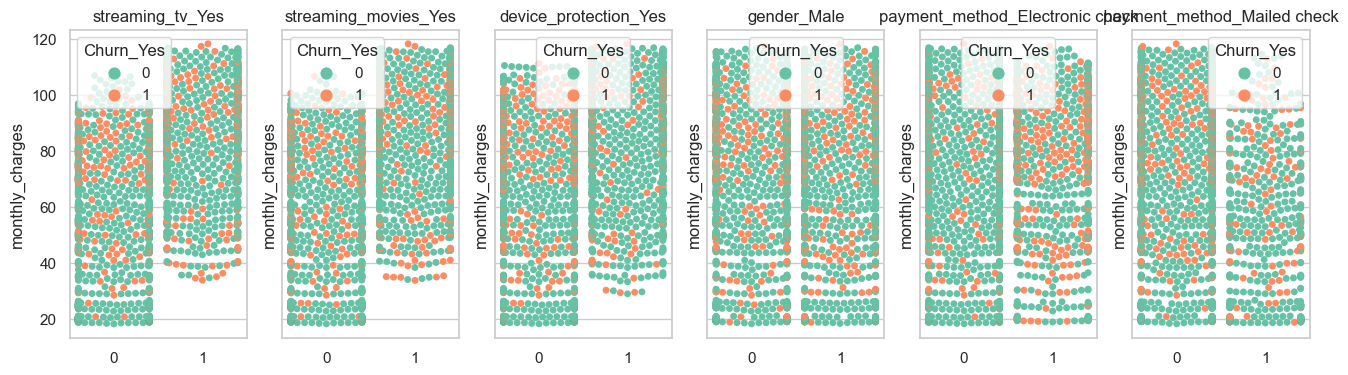

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 83.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 84.5% of the points

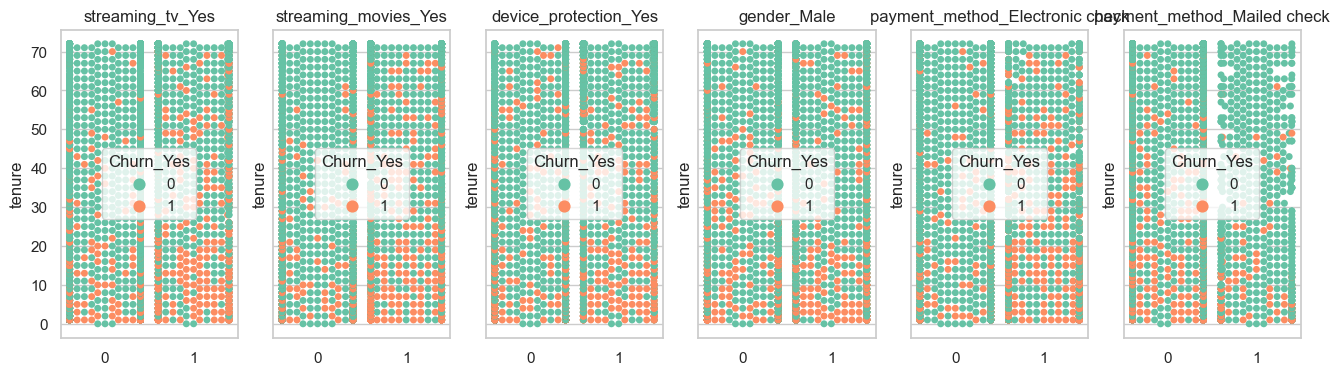

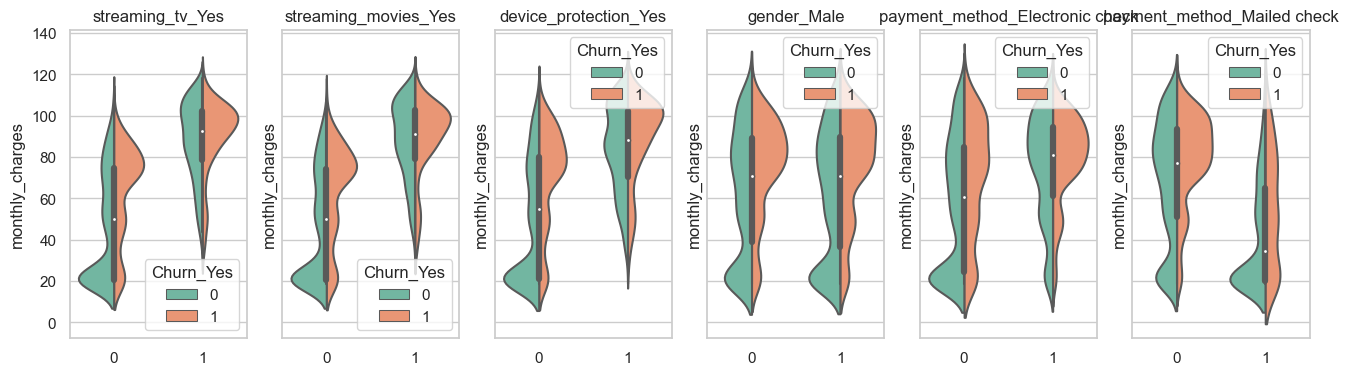

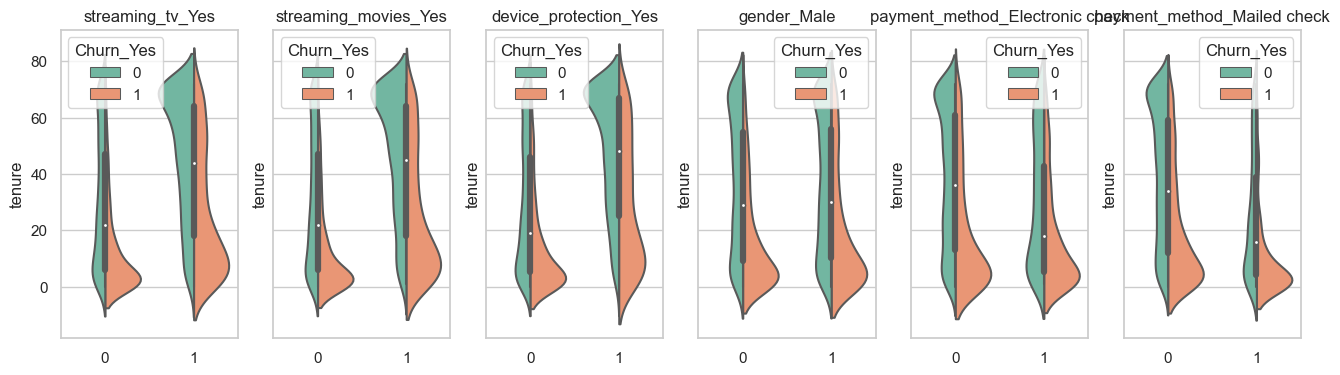

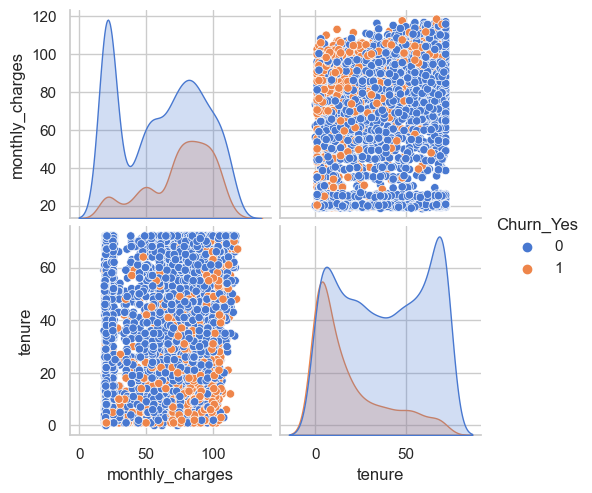

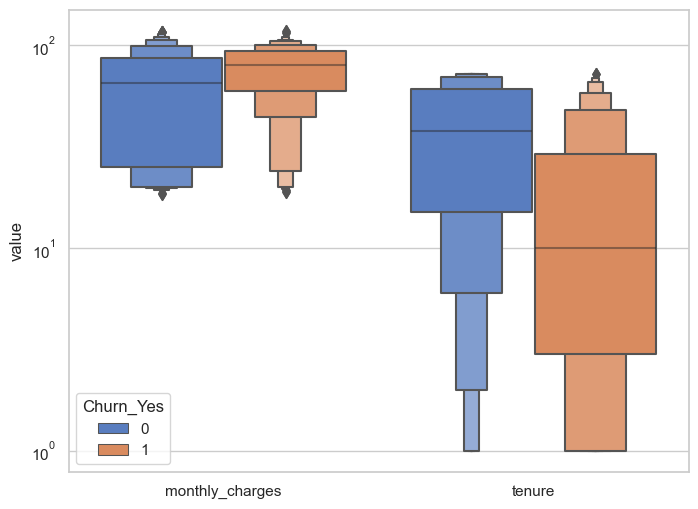

In [28]:
target = 'Churn_Yes'

explore.explore_multivariate(train, target, cat_vars, quant_vars)


In [ ]:
# 1) Create a model that includes FiberOptic and Monthly Charges. Does this model perform 
# better than your baseline?

In [29]:
df

customer_id  senior_citizen  tenure  monthly_charges  total_charges  \
0     7590-VHVEG               0       1            29.85          29.85   
1     5575-GNVDE               0      34            56.95        1889.50   
2     3668-QPYBK               0       2            53.85         108.15   
3     7795-CFOCW               0      45            42.30        1840.75   
4     9237-HQITU               0       2            70.70         151.65   
...          ...             ...     ...              ...            ...   
7038  6840-RESVB               0      24            84.80        1990.50   
7039  2234-XADUH               0      72           103.20        7362.90   
7040  4801-JZAZL               0      11            29.60         346.45   
7041  8361-LTMKD               1       4            74.40         306.60   
7042  3186-AJIEK               0      66           105.65        6844.50   

      internet_service_Fiber optic  internet_service_No  gender_Male  \
0                                0                    0            0   
1                                0                    0            1   
2                                0                    0            1   
3                                0                    0            1   
4                                1                    0            0   
...                            ...                  ...          ...   
7038                             0                    0            1   
7039                             1                    0            0   
7040                             0                    0            0   
7041                             1                    0            1   
7042                             1                    0            1   

      payment_method_Credit card (automatic)  payment_method_Electronic check  \
0                                          0                                1   
1                                          0                                0   
2                                          0                                0   
3                                          0                                0   
4                                          0                                1   
...                                      ...                              ...   
7038                                       0                                0   
7039                                       1                                0   
7040                                       0                                1   
7041                                       0                                0   
7042                                       0                                0   

      ...  device_protection_No internet service  device_protection_Yes  \
0     ...                                      0                      0   
1     ...                                      0                      1   
2     ...                                      0                      0   
3     ...                                      0                      1   
4     ...                                      0                      0   
...   ...                                    ...                    ...   
7038  ...                                      0                      1   
7039  ...                                      0                      1   
7040  ...                                      0                      0   
7041  ...                                      0                      0   
7042  ...                                      0                      1   

      Churn_Yes  tech_support_No internet service  tech_support_Yes  \
0             0                                 0                 0   
1             0                                 0                 0   
2             1                                 0                 0   
3             0                                 0                 1  

In [31]:
# Same as baseline accuracy?
logit = LogisticRegression(random_state = 1349)

features = ['internet_service_Fiber optic','senior_citizen','tech_support_Yes']

logit.fit(X_train[features], y_train)

y_pred = logit.predict(X_train[features])

accuracy = logit.score(X_train[features], y_train)
accuracy

0.740806492518387

In [32]:
# Validate
y_pred_validate = logit.predict(X_validate[features])

print(classification_report(y_validate, y_pred_validate))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1242
           1       0.52      0.20      0.28       449

    accuracy                           0.74      1691
   macro avg       0.64      0.57      0.56      1691
weighted avg       0.70      0.74      0.69      1691



tech_support_Yes 
_____________________

        chi2       p-value  degrees of freedom
0  28.193945  1.097474e-07                   1

observed:
 Churn_Yes         0.0  2.0  All
tech_support_Yes               
0.0               173  197  370
2.0                74   21   95
All               247  218  465

expected:
             0           1
0  196.537634  173.462366
1   50.462366   44.537634


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


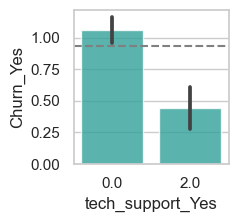


_____________________



In [33]:
fiber_o_sub = train[train['internet_service_Fiber optic']==1]
senior_subset = train[train.senior_citizen==1]
fiber_senior = fiber_o_sub + senior_subset
explore.explore_bivariate_categorical(fiber_senior, 'Churn_Yes', 'tech_support_Yes')

In [34]:
fiber_senior

customer_id  senior_citizen  tenure  monthly_charges  \
5                      NaN             NaN     NaN              NaN   
8                      NaN             NaN     NaN              NaN   
12                     NaN             NaN     NaN              NaN   
13                     NaN             NaN     NaN              NaN   
14                     NaN             NaN     NaN              NaN   
...                    ...             ...     ...              ...   
7014                   NaN             NaN     NaN              NaN   
7022                   NaN             NaN     NaN              NaN   
7032  6894-LFHLY6894-LFHLY             2.0     2.0            151.5   
7033                   NaN             NaN     NaN              NaN   
7042                   NaN             NaN     NaN              NaN   

      total_charges  internet_service_Fiber optic  internet_service_No  \
5               NaN                           NaN                  NaN   
8               NaN                           NaN                  NaN   
12              NaN                           NaN                  NaN   
13              NaN                           NaN                  NaN   
14              NaN                           NaN                  NaN   
...             ...                           ...                  ...   
7014            NaN                           NaN                  NaN   
7022            NaN                           NaN                  NaN   
7032          151.5                           2.0                  0.0   
7033            NaN                           NaN                  NaN   
7042            NaN                           NaN                  NaN   

      gender_Male  payment_method_Credit card (automatic)  \
5             NaN                                     NaN   
8             NaN                                     NaN   
12            NaN                                     NaN   
13            NaN                                     NaN   
14            NaN                                     NaN   
...           ...                                     ...   
7014          NaN                                     NaN   
7022          NaN                                     NaN   
7032          2.0                                     0.0   
7033          NaN                                     NaN   
7042          NaN                                     NaN   

      payment_method_Electronic check  ...  \
5                                 NaN  ...   
8                                 NaN  ...   
12                                NaN  ...   
13                                NaN  ...   
14                                NaN  ...   
...                               ...  ...   
7014                              NaN  ...   
7022                              NaN  ...   
7032                              2.0  ...   
7033                              NaN  ...   
7042                              NaN  ...   

      device_protection_No internet service  device_protection_Yes  Churn_Yes  \
5                                       NaN                    NaN        NaN   
8                                       NaN                    NaN        NaN   
12                                      NaN                    NaN        NaN   
13                                      NaN                    NaN        NaN   
14                                      NaN                    NaN        NaN   
...                                     ...                    ...        ...   
7014                                    NaN                    NaN        NaN   
7022                                    NaN                    NaN        NaN   
7032                                    0.0                    0.0        2.0   
7033                                    NaN                    NaN        NaN   
7042                                    NaN                    NaN        NaN   

      tech_sup

internet_service_Fiber optic 
_____________________

        chi2   p-value  degrees of freedom
0  15.244049  0.000094                   1

observed:
 Churn_Yes                       0    1  All
internet_service_Fiber optic               
0                             121   50  171
1                             247  218  465
All                           368  268  636

expected:
             0           1
0   98.943396   72.056604
1  269.056604  195.943396


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


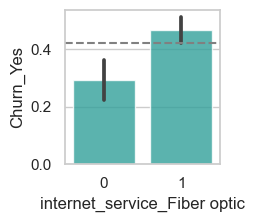


_____________________



In [35]:
senior_subset = train[train.senior_citizen==1] 

explore.explore_bivariate_categorical(senior_subset, 'Churn_Yes', 'internet_service_Fiber optic')

tech_support_Yes 
_____________________

       chi2       p-value  degrees of freedom
0  39.09173  4.043532e-10                   1

observed:
 Churn_Yes           0    1  All
tech_support_Yes               
0                 247  238  485
1                 121   30  151
All               368  268  636

expected:
             0           1
0  280.628931  204.371069
1   87.371069   63.628931


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


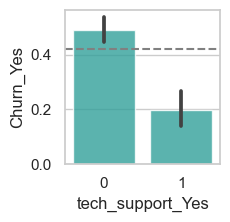


_____________________



In [36]:
senior_subset2 = train[train.senior_citizen==1]

explore.explore_bivariate_categorical(senior_subset2, 'Churn_Yes', 'tech_support_Yes')